<a href="https://colab.research.google.com/github/fabrizio25504/UNMSM_Quimica_general/blob/main/PC_Cinetica_Fabrizio_Mantari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 12.4 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# Molecula sis

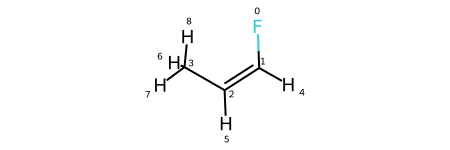

In [4]:
smiles = "F\C=C/C"
mol_cis = Chem.MolFromSmiles(smiles)
mol_cis = Chem.AddHs(mol_cis)
Chem.AllChem.EmbedMolecule(mol_cis,useRandomCoords=False, randomSeed = 117)
Chem.MolToXYZFile(mol_cis,"cis.xyz")
mol_cis

In [5]:
cat cis.xyz

9

F      1.278133    1.454392    0.361707
C      1.324428    0.114406    0.086771
C      0.211875   -0.600289   -0.107579
C     -1.080091    0.141775   -0.008462
H      2.264732   -0.419036    0.015914
H      0.255235   -1.675106   -0.327775
H     -1.411267    0.291329    1.031244
H     -1.860128   -0.435483   -0.531530
H     -0.982917    1.128011   -0.520291


In [6]:
from pyscf import gto, scf

In [7]:
mol_cis1 = gto.M(atom="cis.xyz")

In [8]:
# set basis set
mol_cis1.basis = "6-31G"

# set the functional
mf = mol_cis1.KS()
mf.xc = 'b3lyp'

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [9]:
mf.kernel()

converged SCF energy = -214.251990680735


-214.25199068073454

In [10]:
resultado_cis =[mf.kernel()]

converged SCF energy = -214.251990680735


# Molecula trans

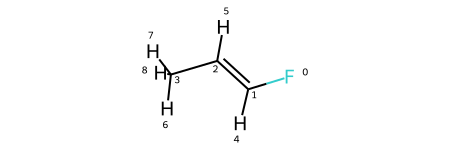

In [11]:
smiles = "F/C=C/C"
mol_trans = Chem.MolFromSmiles(smiles)
mol_trans = Chem.AddHs(mol_trans)
Chem.AllChem.EmbedMolecule(mol_trans,useRandomCoords=False, randomSeed = 117)
Chem.MolToXYZFile(mol_trans,"trans.xyz")
mol_trans

In [12]:
cat trans.xyz

9

F      2.531086   -0.018901   -0.127428
C      1.247998   -0.409791   -0.108192
C      0.290031    0.466354    0.026514
C     -1.140194    0.045176    0.049478
H      1.000126   -1.460952   -0.204970
H      0.479347    1.517127    0.126003
H     -1.255347   -1.004178   -0.314946
H     -1.694646    0.764347   -0.567021
H     -1.458401    0.100818    1.120562


In [13]:
mol_trans1 = gto.M(atom = "trans.xyz")
mol_trans1.basis = "6-31G"
mf1 = mol_trans1.KS()
mf1.xc = 'b3lyp'

In [14]:
mf1.kernel()

converged SCF energy = -214.249799819274


-214.24979981927373

In [15]:
resultado_trans =[mf1.kernel()]

converged SCF energy = -214.249799819274


# Molecula Cis rotada(90°)

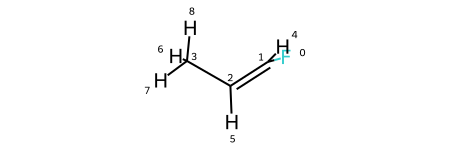

In [16]:
Chem.AllChem.SetDihedralDeg(mol_cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(mol_cis, "90.xyz")
mol_cis

In [17]:
cat 90.xyz

9

F      1.874246    0.262754    1.331355
C      1.324428    0.114406    0.086771
C      0.211875   -0.600289   -0.107579
C     -1.080091    0.141775   -0.008462
H      1.769638    0.570620   -0.789248
H      0.255235   -1.675106   -0.327775
H     -1.411267    0.291329    1.031244
H     -1.860128   -0.435483   -0.531530
H     -0.982917    1.128011   -0.520291


In [18]:
mol_90 = gto.M(atom = "90.xyz")
mol_90.basis = "6-31G"
mf2 = mol_90.KS()
mf2.xc = 'b3lyp'

In [19]:
mf2.kernel()

converged SCF energy = -214.08748631938


-214.0874863193801

In [20]:
resultado_CA = [mf2.kernel()]

converged SCF energy = -214.08748631938


# Grafico

In [21]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-1jkqv4mx
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-1jkqv4mx
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9465 sha256=a652f258403b8bd6f6df96cb1baebb8470fef9fa5e8c13342745154fdd56e99b
  Stored in directory: /tmp/pip-ephem-wheel-cache-vr0t05uk/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


converged SCF energy = -214.251990680734
converged SCF energy = -214.08748631938
converged SCF energy = -214.249799819274


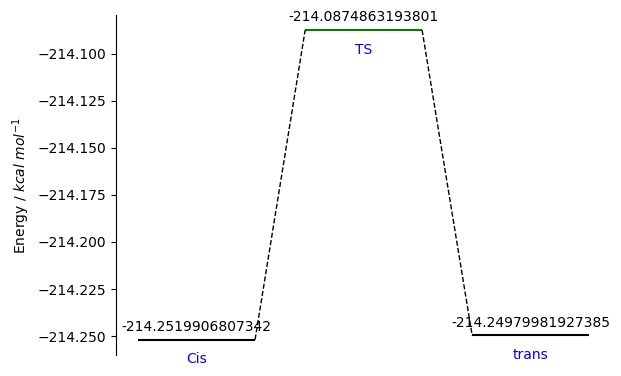

In [22]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(mf.kernel(),'Cis')
diagram.add_level(mf2.kernel(),'TS',color='g')
diagram.add_level(mf1.kernel(),'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel


# ¿Reacción endotérmica o exotérmica?

In [23]:
E_reactante = mf.kernel()

converged SCF energy = -214.251990680735


In [24]:
E_producto = mf1.kernel()

converged SCF energy = -214.249799819273


In [25]:
E_entalpia = E_producto - E_reactante
E_entalpia

0.0021908614615426814

Entonces debido a que la energía de entalpia resulta positiva podemos afirmar que es una reacción  **Exotermica**

A continuación Calcularemos la energía de activación.

In [26]:
E_comp_act = mf2.kernel()

converged SCF energy = -214.08748631938


In [27]:
E_act = E_comp_act - E_reactante
print("el valor de la energia de activación es de ",round(E_act,2),"J")

el valor de la energia de activación es de  0.16 J
